# Rental Price Analysis of India's IT Capital - Pune, MH, IND

**Problem Defination** 

Pune is IT capital of India  & a city with 10,089,916 population. Pune is one of the larger employment producing city. So Most of peoples are living in rental houses & appartment.  so I'm going to predict the housing rental prices of areas in city.

you can check my dataset is here :

1. Rental Price Data - [kaggle](https://www.kaggle.com/anantsakhare/rental-price-of-indias-it-capital-pune-mh-ind) 
2. Housing data Scrapper - [github](https://github.com/senhorinfinito/scrappers/blob/main/rental_analysis/train.csv)

## Exploring dataset
### Import Libraries

In [1]:
## Import Essential Libraries
# !pip install geocoder
# !pip install geopy
import os #for file part
from math import * # for mathmatically relations & computation  
from scipy.stats import * # Stat testing
import numpy as np # array operations 
import re # working on text data 
import pandas as pd # dataframe operations
import matplotlib.pyplot as plt # visualisations
import seaborn as sns # Viz
import geocoder # Geographical Data analysis
import geopy # Geographical data
from geopy.geocoders import Nominatim  # Geographical data

# All machine leanring libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
### Load data into a dataframe
train = pd.read_csv('train.csv', encoding = 'utf-8')

**Know more about dataset** 

In [3]:
train.shape

(10884, 30)

Based on data shape of data data has around 10884 sample with 30 features. 

In [4]:
train.info() # lookin for dtypes , null values inside data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10884 entries, 0 to 10883
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedroom            10884 non-null  int64  
 1   bathrooms          10884 non-null  int64  
 2   area               10884 non-null  float64
 3   furnishing         10884 non-null  object 
 4   avalable_for       10884 non-null  object 
 5   address            10884 non-null  object 
 6   floor_number       10884 non-null  int64  
 7   facing             10884 non-null  object 
 8   floor_type         10884 non-null  object 
 9   gate_community     10884 non-null  object 
 10  corner_pro         10884 non-null  object 
 11  parking            10884 non-null  int64  
 12  wheelchairadption  10884 non-null  object 
 13  petfacility        10884 non-null  object 
 14  aggDur             10884 non-null  int64  
 15  noticeDur          10884 non-null  int64  
 16  lightbill          108

In [5]:
train.isnull().sum()

bedroom              0
bathrooms            0
area                 0
furnishing           0
avalable_for         0
address              0
floor_number         0
facing               0
floor_type           0
gate_community       0
corner_pro           0
parking              0
wheelchairadption    0
petfacility          0
aggDur               0
noticeDur            0
lightbill            0
powerbackup          0
propertyage          0
no_room              0
pooja_room           0
study_room           0
others               0
servant_room         0
store_room           0
maintenance_amt      0
brok_amt             0
deposit_amt          0
mnt_amt              0
rent                 0
dtype: int64

In [6]:
train.describe() # A brief stat of data

,bedroom,bathrooms,area,floor_number,parking,aggDur,noticeDur,lightbill,powerbackup,no_room,pooja_room,study_room,others,servant_room,store_room,brok_amt,deposit_amt,mnt_amt,rent
count,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,1.088400e+04,10884.000000,1.088400e+04
mean,1.797868,1.779677,528.558560,3.062018,0.884693,7.423649,0.722345,0.172639,0.712422,0.750276,0.062201,0.048144,0.124495,0.032157,0.045296,7075.270764,3.670939e+04,257.493025,2.855947e+04
std,0.807328,0.832231,930.460935,2.390430,0.559457,7.670543,0.698966,0.377952,0.842667,0.432873,0.241532,0.214080,0.330160,0.176426,0.207962,17269.507644,5.589578e+04,1247.938097,1.183249e+06
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.600000e+03
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,1.050000e+04
50%,2.000000,2.000000,510.000000,3.000000,1.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+04,0.000000,1.500000e+04
75%,2.000000,2.000000,840.000000,5.000000,1.000000,11.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9000.000000,5.000000e+04,0.000000,2.100000e+04
max,22.000000,22.000000,72775.000000,9.000000,9.000000,36.000000,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,275000.000000,1.500000e+06,40000.000000,1.234568e+08


In [7]:
df = train.copy() # createing a copy of original data of actual cleaning & feature engineering puppose

**Now we have a proper dataset copy so we can work on that** 

In [8]:
df.head(3)

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,All,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Marble,Yes,...,0,0,0,0,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,All,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Vitrified,Yes,...,0,0,0,0,0,0,0,40000,0.0,14000.0
2,3,3,0.0,Semifurnished,All,"Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra",1,South-West,Vitrified,Yes,...,0,0,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,22999.0


## Few Feature Engineering on Target variables

In [9]:
## Warning / NOTe
## few working requied on rent here intial
print('shape before', df.shape)
df.drop(df[df['rent'] >= 123456789].index, axis = 0, inplace = True) # this values is added by purpose while doing data cleaning 
print('shape after', df.shape)

shape before (10884, 30)
shape after (10883, 30)


In [10]:
df.area.replace(0, np.nan, inplace =  True)
df.area.isnull().sum()

pd.pivot_table(df, values= 'area', columns='bedroom', aggfunc= 'mean').T
pd.pivot_table(df, values= 'area', columns='bedroom', aggfunc= 'median').T

m1 = df['bedroom']  == 1
m2 = df['bedroom']  == 2
m3 = df['bedroom']  == 3
m4 = df['bedroom']  == 4
m5 = df['bedroom']  == 5
m6 = df['bedroom']  == 6
df.loc[m1, 'area'] = df.loc[m1,'area'].fillna(df.loc[m1,'area'].median())
df.loc[m2, 'area'] = df.loc[m2,'area'].fillna(df.loc[m2,'area'].median())
df.loc[m3, 'area'] = df.loc[m3,'area'].fillna(df.loc[m3,'area'].median())
df.loc[m4, 'area'] = df.loc[m4,'area'].fillna(df.loc[m4,'area'].median())
df.loc[m5, 'area'] = df.loc[m5,'area'].fillna(df.loc[m5,'area'].median())
df.loc[m6, 'area'] = df.loc[m6,'area'].fillna(df.loc[m6,'area'].median())



## Exploratory Data Analysis 

Convert all variable into following categories
1. Binary variables data
2. Ordinal Varibles 
3. continous  data
4. target Variable

In [11]:
num_columns = df.describe().columns
categorical_cols = df.describe(include= 'object').columns

In [12]:
# checking for binary data & oridinal & continous_data 
for i in df.columns:
    print(len(df[i].unique()), end = '    ')
# range varies form 2 to  6387


10    9    932    4    8    6387    10    9    15    2    2    9    2    2    25    7    2    3    6    2    2    2    2    2    2    174    162    184    143    321    

In [13]:
binary_variables = [i  for i in df.columns  if (len(df[i].unique()) == 2)]

In [14]:
ordinal_variables= [i for i in df.columns if ((len(df[i].unique()) > 2 ) and (len(df[i].unique()) <= 25))]

In [15]:
continous_variable = [i for i in df.columns if ((len(df[i].unique()) > 25))]
## Remove rent from data
continous_variable = continous_variable[:-1]

In [16]:
target_variable = 'rent'

### Start with Binary Variable Visualisation.


In [17]:
print(binary_variables, end = ' ')

('element in binary category', len(binary_variables))

['gate_community', 'corner_pro', 'wheelchairadption', 'petfacility', 'lightbill', 'no_room', 'pooja_room', 'study_room', 'others', 'servant_room', 'store_room'] 

('element in binary category', 11)

In [18]:
df.gate_community.value_counts().index

Index(['Yes', 'No'], dtype='object')

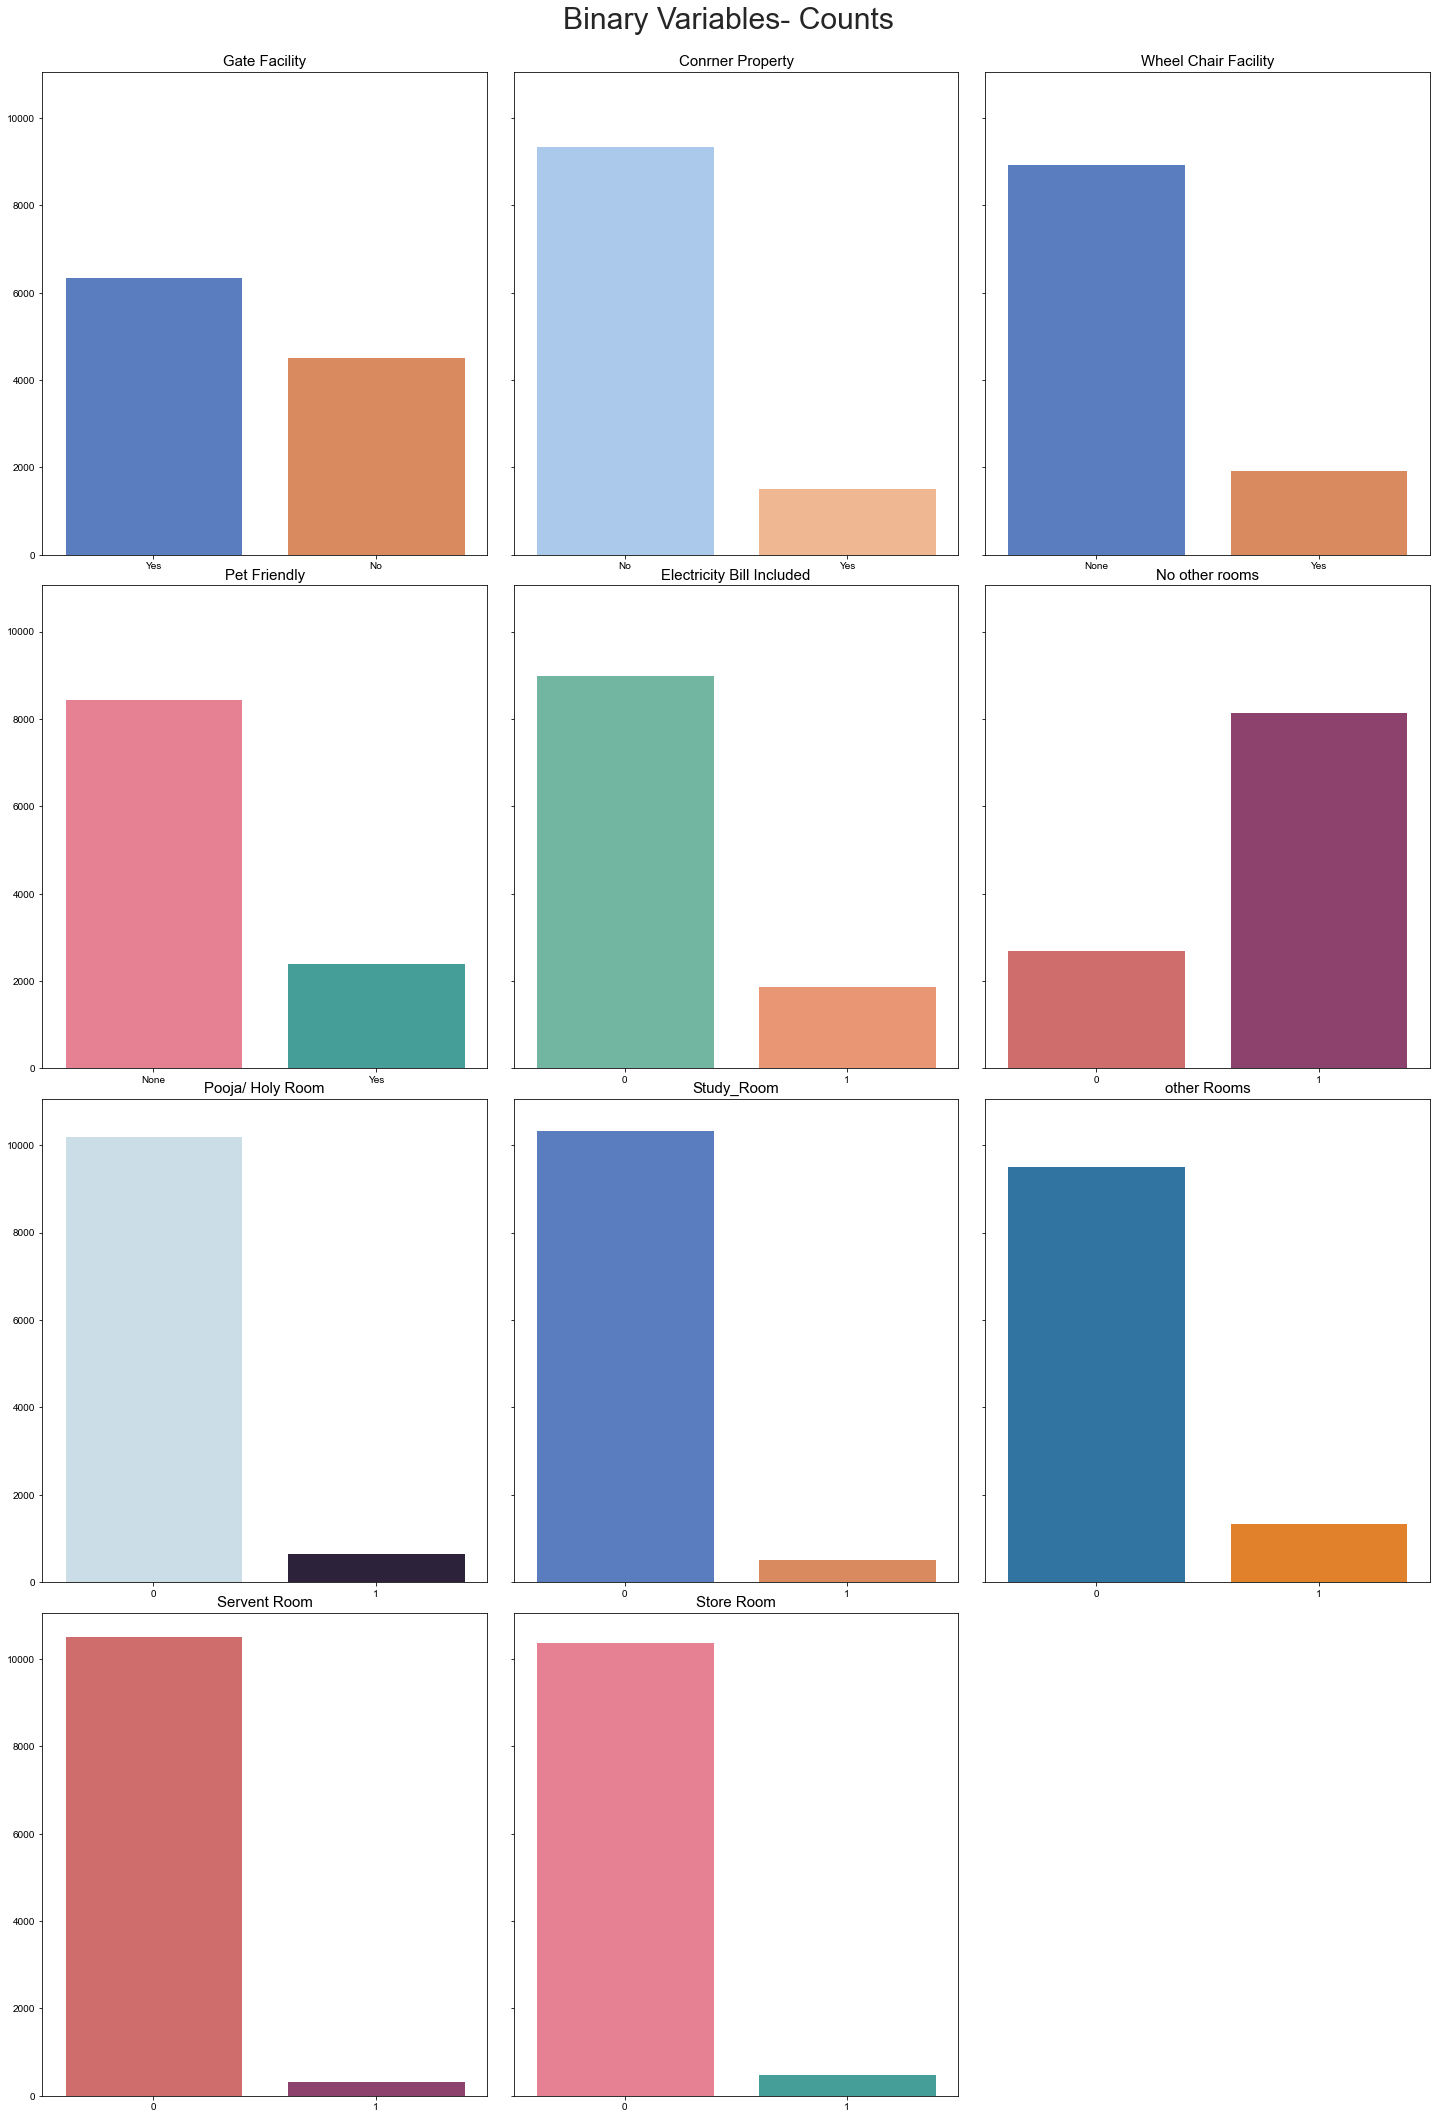

In [19]:
fig, ax = plt.subplots(4,3, figsize = (20,30), sharey = True)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

sns.set_style('white')
fig.suptitle('Binary Variables- Counts', size = 30)
sns.barplot(ax= ax[0,0], data =df , x = df.gate_community.value_counts().index, y = df.gate_community.value_counts().values,palette= 'muted' )
ax[0,0].set_title('Gate Facility', fontsize = 15)
sns.barplot(ax= ax[0,1], data =df , x = df.corner_pro.value_counts().index, y = df.corner_pro.value_counts().values,palette= 'pastel' )
ax[0,1].set_title('Conrner Property', fontsize = 15)
sns.barplot(ax= ax[0,2], data =df , x = df.wheelchairadption.value_counts().index, y = df.wheelchairadption.value_counts().values,palette= 'muted' )
ax[0,2].set_title('Wheel Chair Facility',   fontsize = 15)
sns.barplot(ax= ax[1,0], data =df , x = df.petfacility.value_counts().index, y = df.petfacility.value_counts().values,palette= 'husl' )
ax[1,0].set_title('Pet Friendly',  fontsize = 15)
sns.barplot(ax= ax[1,1], data =df , x = df.lightbill.value_counts().index, y = df.lightbill.value_counts().values,palette= 'Set2' )
ax[1,1].set_title('Electricity Bill Included',  fontsize = 15)
sns.barplot(ax= ax[1,2], data =df , x = df.no_room.value_counts().index, y = df.no_room.value_counts().values,palette= 'flare' )
ax[1,2].set_title('No other rooms',  fontsize = 15)
sns.barplot(ax= ax[2,0], data =df , x = df.pooja_room.value_counts().index, y = df.pooja_room.value_counts().values,palette= 'ch:s=.25,rot=-.25' )
ax[2,0].set_title('Pooja/ Holy Room',  fontsize = 15)
sns.barplot(ax= ax[2,1], data =df , x = df.study_room.value_counts().index, y = df.study_room.value_counts().values,palette= 'muted' )
ax[2,1].set_title('Study_Room',  fontsize = 15)
sns.barplot(ax= ax[2,2], data =df , x = df.others.value_counts().index, y = df.others.value_counts().values )
ax[2,2].set_title('other Rooms',  fontsize = 15)
sns.barplot(ax= ax[3,0], data =df , x = df.servant_room.value_counts().index, y = df.servant_room.value_counts().values,palette= 'flare' )
ax[3,0].set_title('Servent Room',  fontsize = 15)
sns.barplot(ax= ax[3,1], data =df , x = df.store_room.value_counts().index, y = df.store_room.value_counts().values,palette= 'husl' )
ax[3,1].set_title('Store Room',  fontsize = 15)
# sns.barplot(ax=ax[3,2], x = df.index, y = df.rent)
fig.delaxes(ax[3][2])
fig.savefig('my.jpg')

**Based on above plots I found that if Facility is available then rent for home is always higher**

### Ordinal Variables 

In [20]:
print(ordinal_variables, end = ' ')
('Number of ordinal features is', len(ordinal_variables))

['bedroom', 'bathrooms', 'furnishing', 'avalable_for', 'floor_number', 'facing', 'floor_type', 'parking', 'aggDur', 'noticeDur', 'powerbackup', 'propertyage'] 

('Number of ordinal features is', 12)

In [21]:
### working on oultiers which I found while working on previously on porject
df.groupby('bedroom').count()
# we have more than 6  bedrooms in single homes  so we will drop to reduce outliers  totals around 20
print('before shape',df.shape)
df.drop(df[df['bedroom']>= 6].index, axis = 0, inplace = True)
print('after droping rows the shape is ', df.shape)

before shape (10883, 30)
after droping rows the shape is  (10877, 30)


In [22]:
print('before replacement', df.furnishing.unique())
df.furnishing.replace('Unfurnishe', 'Unfurnished', inplace = True)
print('after replacement', df.furnishing.unique())

before replacement ['Unfurnished' 'Semifurnished' 'Furnished' 'Unfurnishe']
after replacement ['Unfurnished' 'Semifurnished' 'Furnished']


In [23]:
print(ordinal_variables, end = ' ')
('Number of ordinal features is', len(ordinal_variables))

['bedroom', 'bathrooms', 'furnishing', 'avalable_for', 'floor_number', 'facing', 'floor_type', 'parking', 'aggDur', 'noticeDur', 'powerbackup', 'propertyage'] 

('Number of ordinal features is', 12)

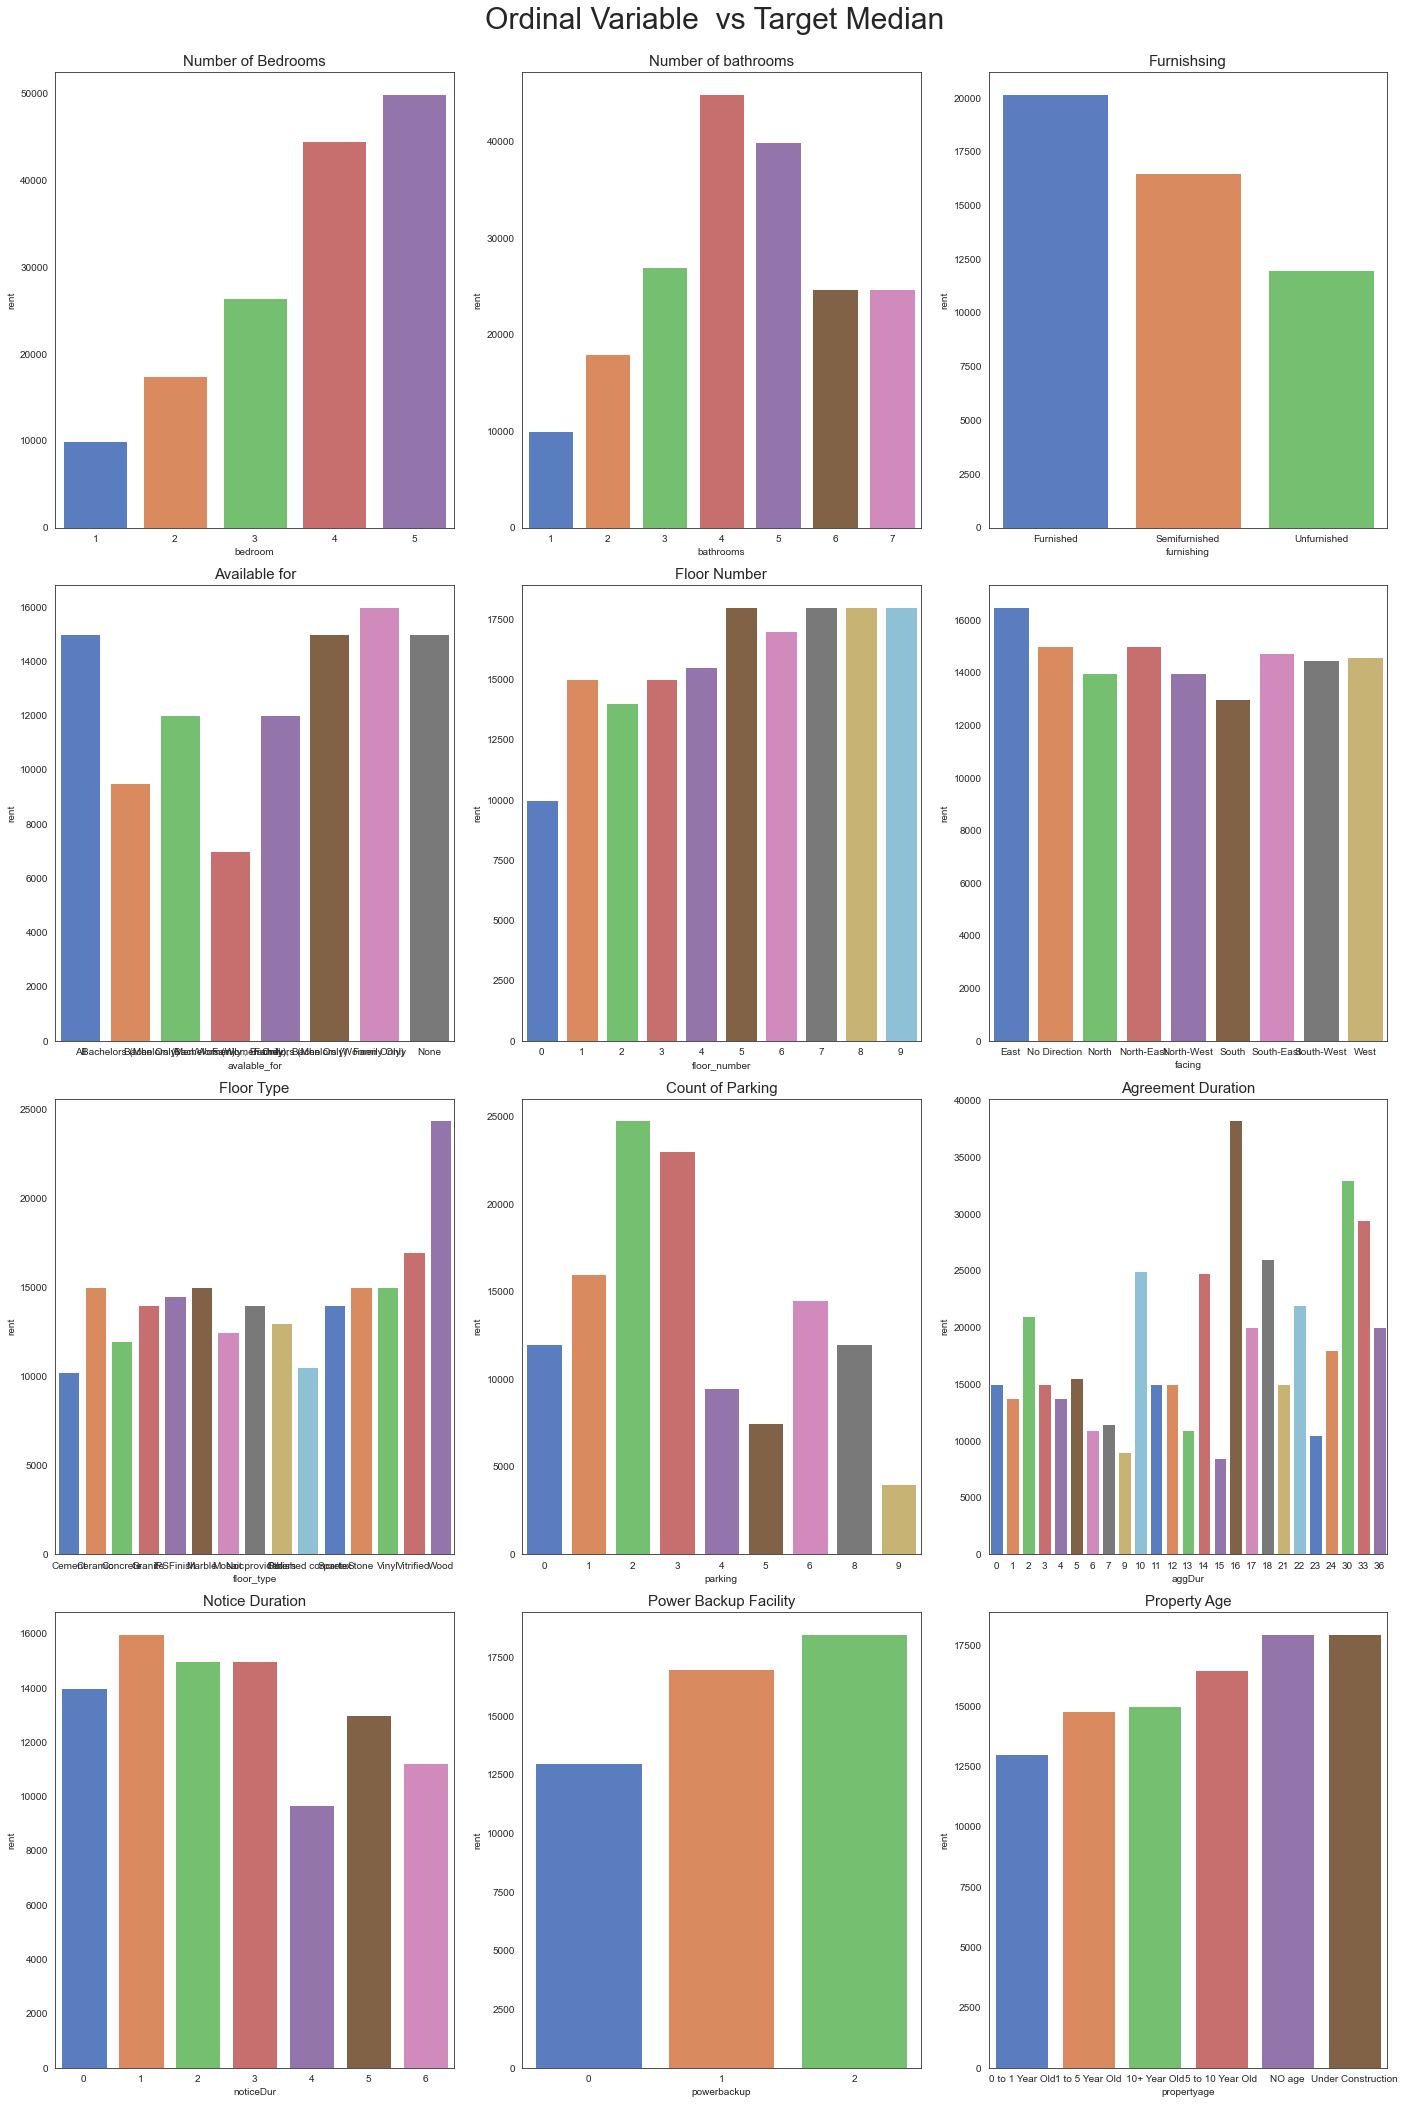

In [24]:
fig, ax = plt.subplots(4,3, figsize = (20,30), sharey = False)
fig.tight_layout(pad= 4.0)
fig.subplots_adjust(top=0.95)

sns.set_style('white')
fig.suptitle('Ordinal Variable  vs Target Median', size = 30)
sns.barplot(ax= ax[0,0], data =df , x = df.groupby('bedroom').median().index, y =df.groupby('bedroom').median().rent,palette= 'muted' )
ax[0,0].set_title('Number of Bedrooms', fontsize = 15)

sns.barplot(ax= ax[0,1], data =df , x = df.groupby('bathrooms').median().index, y =df.groupby('bathrooms').median().rent,palette= 'muted' )
ax[0,1].set_title('Number of bathrooms', fontsize = 15)

sns.barplot(ax= ax[0,2], data =df , x = df.groupby('furnishing').median().index, y =df.groupby('furnishing').median().rent,palette= 'muted' )
ax[0,2].set_title('Furnishsing', fontsize = 15)

sns.barplot(ax= ax[1,0], data =df , x = df.groupby('avalable_for').median().index, y =df.groupby('avalable_for').median().rent,palette= 'muted' )
ax[1,0].set_title('Available for', fontsize = 15)

sns.barplot(ax= ax[1,1], data =df , x = df.groupby('floor_number').median().index, y =df.groupby('floor_number').median().rent,palette= 'muted' )
ax[1,1].set_title('Floor Number', fontsize = 15)

sns.barplot(ax= ax[1,2], data =df , x = df.groupby('facing').median().index, y =df.groupby('facing').median().rent,palette= 'muted' )
ax[1,2].set_title('', fontsize = 15)

sns.barplot(ax= ax[2,0], data =df , x = df.groupby('floor_type').median().index, y =df.groupby('floor_type').median().rent,palette= 'muted' )
ax[2,0].set_title('Floor Type', fontsize = 15)

sns.barplot(ax= ax[2,1], data =df , x = df.groupby('parking').median().index, y =df.groupby('parking').median().rent,palette= 'muted' )
ax[2,1].set_title('Count of Parking', fontsize = 15)

sns.barplot(ax= ax[2,2], data =df , x = df.groupby('aggDur').median().index, y =df.groupby('aggDur').median().rent,palette= 'muted' )
ax[2,2].set_title('Agreement Duration', fontsize = 15)

sns.barplot(ax= ax[3,0], data =df , x = df.groupby('noticeDur').median().index, y =df.groupby('noticeDur').median().rent,palette= 'muted' )
ax[3,0].set_title('Notice Duration', fontsize = 15)

sns.barplot(ax= ax[3,1], data =df , x = df.groupby('powerbackup').median().index, y =df.groupby('powerbackup').median().rent,palette= 'muted' )
ax[3,1].set_title('Power Backup Facility', fontsize = 15)

sns.barplot(ax= ax[3,2], data =df , x = df.groupby('propertyage').median().index, y =df.groupby('propertyage').median().rent,palette= 'muted' )
ax[3,2].set_title('Property Age', fontsize = 15)

fig.savefig('ordinal_variable.jpg', dpi = 100)

**From above visualization we  have concluded following points for higher rent.**
1. As number of bedroom increased rent also has incresed
2. As per furnishing concern Furinished has higher pay than unfurnished
3. Talking about direction if your home has east face your rent is higher as compare with south.
4. As floor number goes higher Rent Also increased
5. Wood Floor design(colors ) has higher pay than marble
6. As per powerbackup facility, if you have full backup == 2  then you need to pay more rent.

### Categorical Variables


In [25]:
# ['address']
cat_variable = ['address']
df[cat_variable].head(2)

,address
0,"Sadguru hights, Pingale Wasti, , Pune, Maharas..."
1,"Manav Silver Springs, Wagholi, , Pune, Maharas..."


**Cleaning messy area & geting proper locality name from this**

In [26]:
locality = []
for i in df.address:
    adds = i.split(',')
    if len(adds) == 4:
        locality.append(adds[0])
    elif len(adds) == 5:
        locality.append(adds[1])
    elif len(adds)  == 6:
        if len(adds[1]) == 1:
            locality.append(adds[2])
        else:
            locality.append(adds[1])
    elif len(adds) == 7:
        locality.append(' '.join(adds[2:4]))
    elif len(adds) == 8:
        locality.append(adds[2])
    else:
        locality.append(adds[4])

In [27]:
df['locality'] = locality
location_summary = df['locality'].value_counts()
locations = [i.replace(',', ' ') for i in df.address]
len(location_summary.index)
location_summary.to_csv('summary.csv')

**This Summary.csv is a file of locality & based on that we are going to fetch latitude & logitude for those columns.**


I used goecoder library to get latitute & longotide for all locations as follows. & stored into a file **all_locations.csv** Which I will import here



**If you wanted to do all geoding please uncomment below code**

In [28]:
# locations = list(df['locality'].value_counts().index)
# def get_latlng(neighborhood):
#     # initialize your variable to None
#     lat_lng_coords = None
#     # loop until you get the coordinates
#     while(lat_lng_coords is None):
#         g = geocoder.arcgis('{} pune maaharashtra india'.format(neighborhood))
#         lat_lng_coords = g.latlng
#     return lat_lng_coords
# coords = list()
# for neighborhood in df2 ["Neighborhood"] .tolist():
#     coords.append(get_latlng(neighborhood))

In [29]:
!pip install folium
map_data = pd.read_csv('all_location.csv')
map_data.drop('Unnamed: 0', axis = 1, inplace =  True)
map_data.head()
lat_long_pune = [18.516726,73.856255]
import folium

def generateBaseMap(default_location= [18.516726,73.856255], default_zoom_start=11.5):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
base_map = generateBaseMap()
## add data to base map

from folium.plugins import HeatMap
base_map = generateBaseMap()

gradient = {.33: 'black', .5: 'blue', 0.7: 'red'}
HeatMap(data=map_data[['Longitude', 'Latitude', 'score']].groupby(['Longitude', 'Latitude']).sum().reset_index().values.tolist(), radius=8, gradient= gradient, max_zoom=13).add_to(base_map)
# map_data.columns
base_map.save('testmap.html')

**output of base map**
![map](map.jpg)

### Continous Variables

In [30]:
# maintenace amt is similar to the mnt_amt & address has more unique values but it comes under categorical columnswe removed
#  both features & now we have area, brok_amt, deposit_amt & mnt_amount. 

continous_variable = continous_variable[0:1] +continous_variable[3:]


First we will look for uniques prices then we will check for missing & random  values 


In [31]:
for i in continous_variable:
    print(i, len(df[i].unique()))

area 930
brok_amt 162
deposit_amt 184
mnt_amt 143


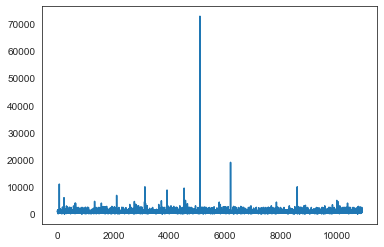

In [32]:
 plt.plot(df.area) # looking for abnormality 

In [33]:
print('shape before', df.shape)
df.drop(df[df['area'] > 15000].index, axis = 0, inplace = True)
print('shape after', df.shape)

shape before (10877, 31)
shape after (10875, 31)


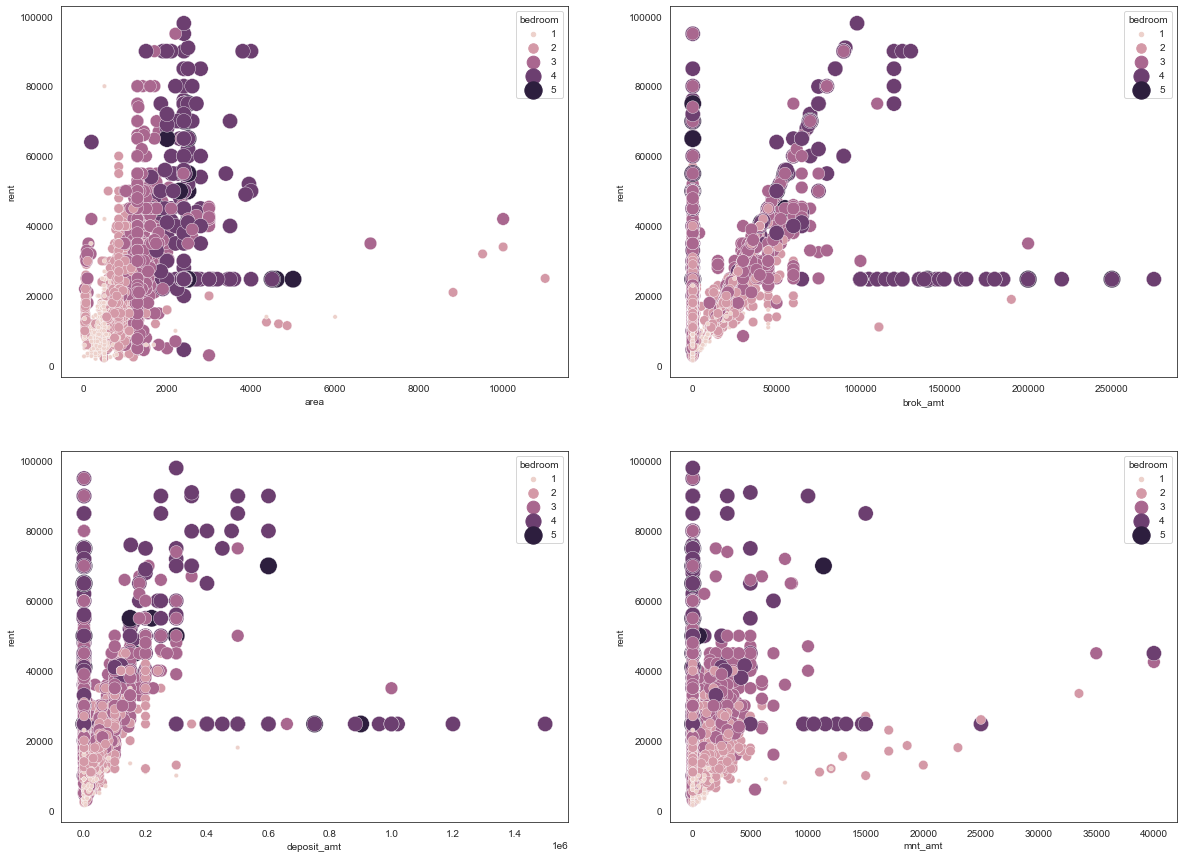

In [34]:
fig, ax =  plt.subplots(2,2, figsize=(20,15) )
sub = [(i,j)  for i in range(0,2) for j in range(0,2)]
for i, j in enumerate(continous_variable):
    sns.scatterplot(ax = ax[ sub[i][0],  sub[i][1]],  data = df, x = j, y = 'rent', hue= 'bedroom', size = 'bedroom', sizes = (20,300))

We have mostly right skewed data in all continous variables 

### Target Varible

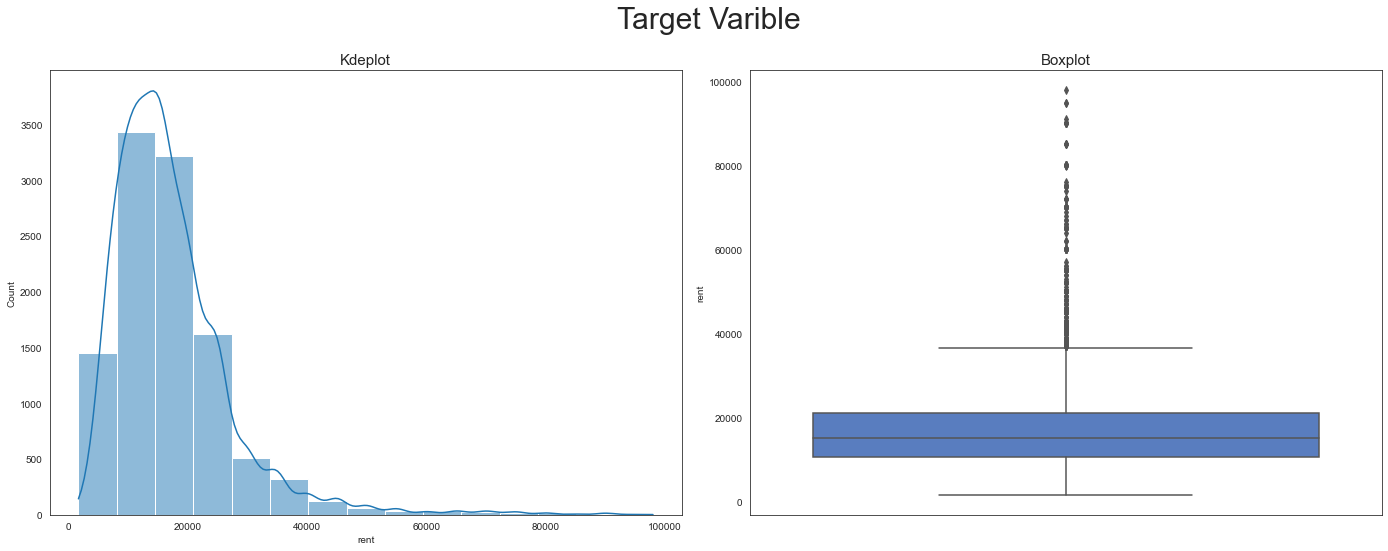

In [35]:
fig, ax = plt.subplots(1,2, figsize = (20,8), sharey = False)
fig.tight_layout(pad= 4.0)
fig.subplots_adjust(top=0.87)
sns.set_style('white')
fig.suptitle('Target Varible', size = 30)
sns.histplot(ax= ax[0], data =df ,x = df.rent, kde =  True, bins = 15)
ax[0].set_title('Kdeplot', fontsize = 15)
sns.boxplot(ax= ax[1], data =df ,y  = df.rent, palette='muted')
ax[1].set_title('Boxplot', fontsize = 15)

fig.savefig('target.jpg', dpi = 250)

## Feature Engineering 

1. Outliers treatment
2. Feature transformation
3. Feature Scaling

### Outlier Treatment

In [36]:
continous_variable

['area', 'brok_amt', 'deposit_amt', 'mnt_amt']

In [37]:
just_test = df.describe().columns

In [38]:
only_file = [i for i in just_test  if i not in binary_variables]
(only_file)

['bedroom',
 'bathrooms',
 'area',
 'floor_number',
 'parking',
 'aggDur',
 'noticeDur',
 'powerbackup',
 'brok_amt',
 'deposit_amt',
 'mnt_amt',
 'rent']

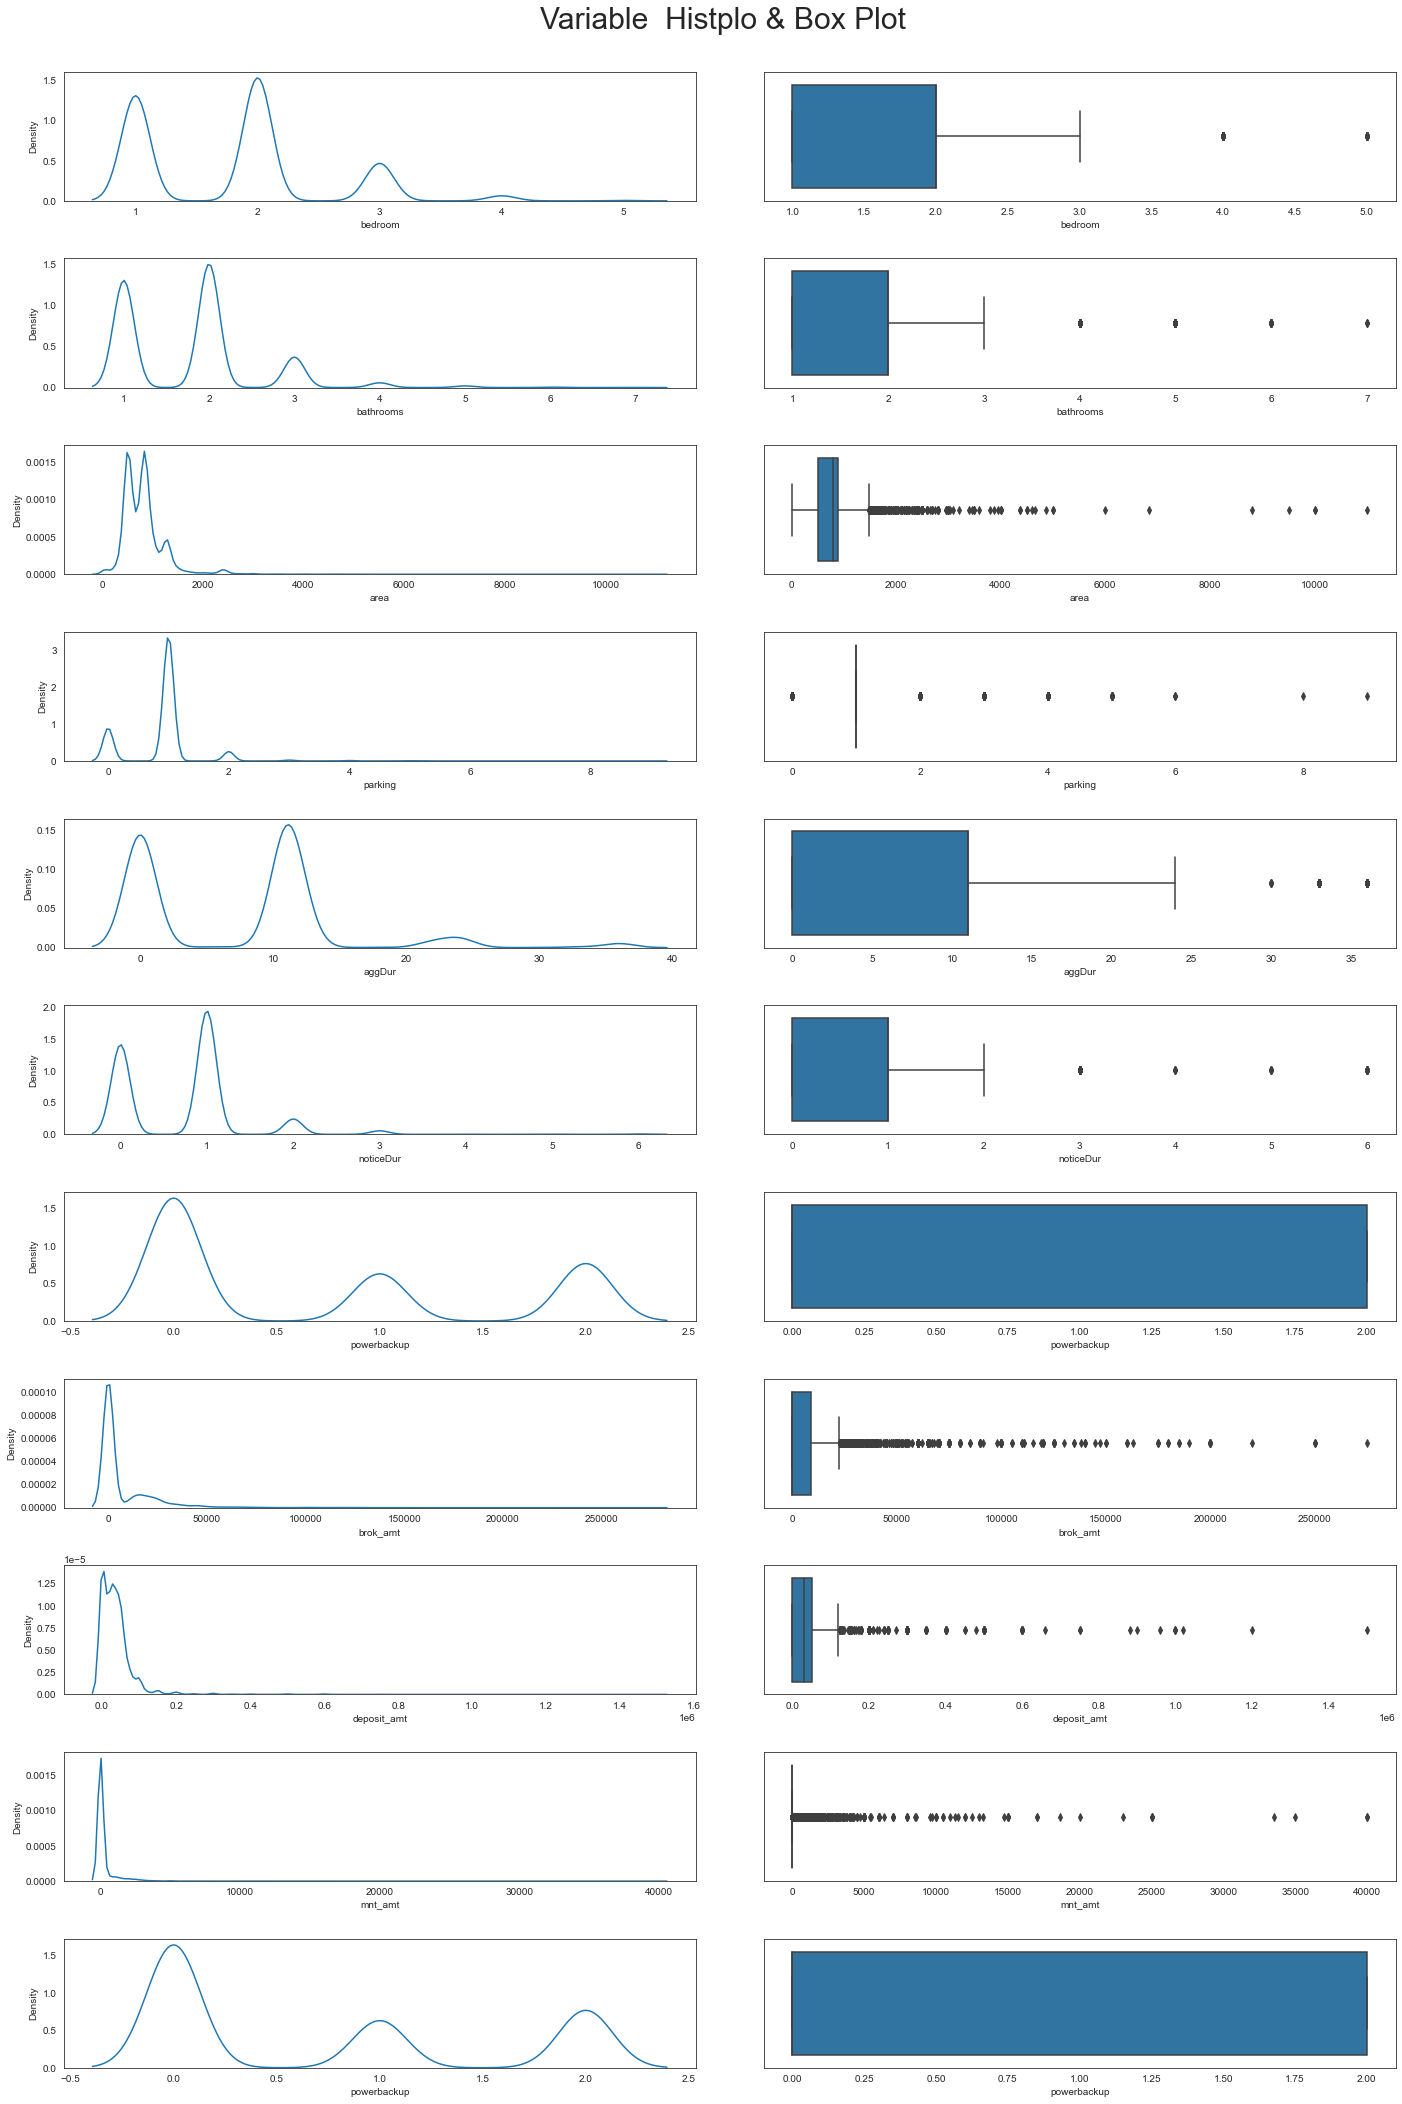

In [39]:
fig, ax = plt.subplots(11,2, figsize = (20,30))
fig.tight_layout(pad = 4.0)
fig.subplots_adjust(top = 0.95)
fig.suptitle('Variable  Histplo & Box Plot', size = 30)
sns.kdeplot(ax= ax[0,0], data = df, x = 'bedroom')
sns.boxplot(ax= ax[0,1], data = df, x = 'bedroom')
sns.kdeplot(ax= ax[1,0], data = df, x = 'bathrooms')
sns.boxplot(ax= ax[1,1], data = df, x = 'bathrooms')
sns.kdeplot(ax= ax[2,0], data = df, x = 'area')
sns.boxplot(ax= ax[2,1], data = df, x = 'area')
sns.kdeplot(ax= ax[3,0], data = df, x = 'parking')
sns.boxplot(ax= ax[3,1], data = df, x = 'parking')
sns.kdeplot(ax= ax[4,0], data = df, x = 'aggDur')
sns.boxplot(ax= ax[4,1], data = df, x = 'aggDur')
sns.kdeplot(ax= ax[5,0], data = df, x = 'noticeDur')
sns.boxplot(ax= ax[5,1], data = df, x = 'noticeDur')
sns.kdeplot(ax= ax[6,0], data = df, x = 'powerbackup')
sns.boxplot(ax= ax[6,1], data = df, x = 'powerbackup')
sns.kdeplot(ax= ax[7,0], data = df, x = 'brok_amt')
sns.boxplot(ax= ax[7,1], data = df, x = 'brok_amt')
sns.kdeplot(ax= ax[8,0], data = df, x = 'deposit_amt')
sns.boxplot(ax= ax[8,1], data = df, x = 'deposit_amt')
sns.kdeplot(ax= ax[9,0], data = df, x = 'mnt_amt')
sns.boxplot(ax= ax[9,1], data = df, x = 'mnt_amt')
sns.kdeplot(ax= ax[10,0], data = df, x = 'powerbackup')
sns.boxplot(ax= ax[10,1], data = df, x = 'powerbackup')
fig.savefig('outlier.png')

Based on data following colums has most outliers & mostly left skewed data:
1. area
2. parking
3. brok_amt
4. seposit_amt
5. mnt_amt

& Little bit features engineering is needed on 
1. Bedroom
2. Bathrooms
3. aggDur
4. NoticeDur




In [40]:
df['end_amt'] = (df['brok_amt'] + (df['mnt_amt'] + df['rent'])*df['aggDur'] - df['deposit_amt'])/df['aggDur']

In [41]:
df['total_room'] = df['bedroom'] + df['pooja_room'] + df['store_room'] + df['study_room'] + df['others'] +df['servant_room']

<AxesSubplot:>

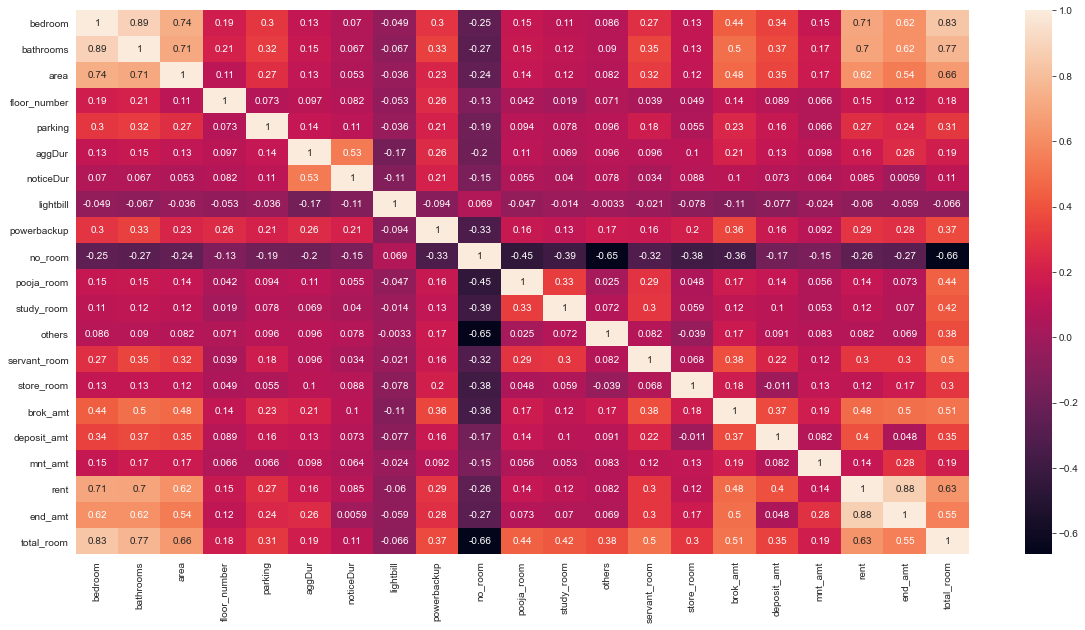

In [42]:
plt.figure(figsize= (20,10))

sns.heatmap(df.corr(), annot = True)

**creating zero variable to 1** 


Also every home has a greater than 510 so we are going replace with bedroom_area median value

In [43]:
df['brok_amt'] = df['brok_amt'] + 1
df['deposit_amt'] = df['deposit_amt'] + 1
df['mnt_amt'] = df['mnt_amt'] + 1
df['rent'] = df['rent'] + 1

In [44]:
area_up =[]
for i in df.area:
    if i < 510:
        area_up.append(np.nan)
    else:
        area_up.append(i)
df['area'] = area_up
df.area.isnull().sum()


1386

In [45]:
# pd.pivot_table(df, values= 'area', columns='bedroom', aggfunc= 'mean').T
# pd.pivot_table(df, values= 'area', columns='bedroom', aggfunc= 'median').T

m1 = df['bedroom']  == 1
m2 = df['bedroom']  == 2
m3 = df['bedroom']  == 3
m4 = df['bedroom']  == 4
m5 = df['bedroom']  == 5
m6 = df['bedroom']  == 6
df.loc[m1, 'area'] = df.loc[m1,'area'].fillna(df.loc[m1,'area'].median())
df.loc[m2, 'area'] = df.loc[m2,'area'].fillna(df.loc[m2,'area'].median())
df.loc[m3, 'area'] = df.loc[m3,'area'].fillna(df.loc[m3,'area'].median())
df.loc[m4, 'area'] = df.loc[m4,'area'].fillna(df.loc[m4,'area'].median())
df.loc[m5, 'area'] = df.loc[m5,'area'].fillna(df.loc[m5,'area'].median())
df.loc[m6, 'area'] = df.loc[m6,'area'].fillna(df.loc[m6,'area'].median())

df.area.isnull().sum()

0

**Area**

In [46]:
len(df[df['area'] == 0])
# we dont  have any mising data on area

0

In [49]:
f , _ =  boxcox(df.area)
df['area'] = f
df['brok_bed_cost'] = (np.log1p(df.brok_amt/ df.bedroom))
df['deposit_amt'] = (np.log(df['deposit_amt']**(1/3)))


Area has all positive data after apply log, sqrt  tranformation I found that we have positive data we can use boxcox transformation here

<AxesSubplot:>

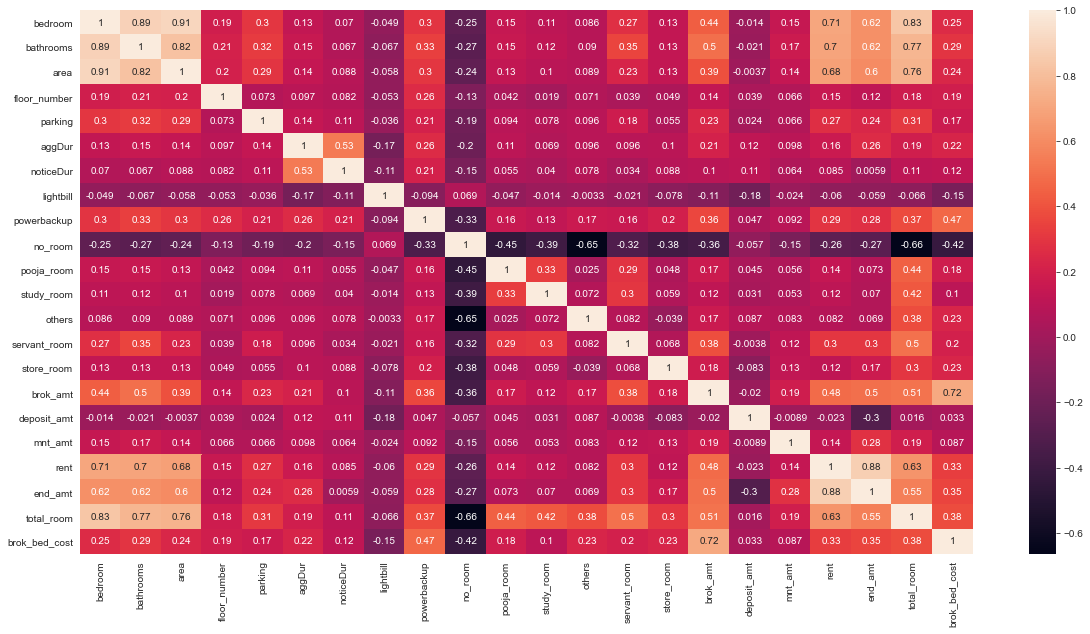

In [50]:
plt.figure(figsize= (20,10))

sns.heatmap(df.corr(), annot = True)

In [51]:
print('before',df.shape)
df.drop(['mnt_amt', 'parking'], axis =  True, inplace =  True)
print('after',df.shape)


before (10875, 34)
after (10875, 32)


In [52]:
print('before',df.shape)
df.drop(['maintenance_amt', 'address'], axis =  True, inplace =  True)
print('after',df.shape)


before (10875, 32)
after (10875, 30)


In [53]:
df.head(2)

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,...,others,servant_room,store_room,brok_amt,deposit_amt,rent,locality,end_amt,total_room,brok_bed_cost
0,2,2,1.092145,Unfurnished,All,5,West,Marble,Yes,No,...,0,0,0,1,0.462098,20001.0,Pingale Wasti,19999.727273,2,0.405465
1,2,2,1.091494,Unfurnished,All,5,East,Vitrified,Yes,Yes,...,0,0,0,1,3.532220,14001.0,Wagholi,10363.636364,2,0.405465


## Feature encoding 

In [55]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
lb, le, oe, ms,ss = LabelBinarizer(), LabelEncoder(), OrdinalEncoder, MinMaxScaler, StandardScaler

In [56]:
bin_trans = [i for i in binary_variables  if i not in df.describe().columns] # geting binary variables & dtype is object
for column in bin_trans:
    df[column] = lb.fit_transform(df[column])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [57]:
## before going to further first work on locality
print('locality has {} unique values & it is huge'.format(len(df['locality'].unique())))

locality has 1467 unique values & it is huge


In [58]:
df.locality.replace('', 'Pune', inplace =  True)


In [59]:
df['address'] = df.locality
df['sqrt_depo'] = np.sqrt(df['bedroom'])
df.head(2)


,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,...,store_room,brok_amt,deposit_amt,rent,locality,end_amt,total_room,brok_bed_cost,address,sqrt_depo
0,2,2,1.092145,Unfurnished,All,5,West,Marble,1,0,...,0,1,0.462098,20001.0,Pingale Wasti,19999.727273,2,0.405465,Pingale Wasti,1.414214
1,2,2,1.091494,Unfurnished,All,5,East,Vitrified,1,1,...,0,1,3.532220,14001.0,Wagholi,10363.636364,2,0.405465,Wagholi,1.414214


In [60]:
area_mean = {}

for area in np.unique(df.address):
#     print(area)
    area_mean[area] = df.loc[df['address'] == area]['sqrt_depo'].mean()
    
df['address_num'] = df['address'].map(area_mean)
df.head(2)

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,...,brok_amt,deposit_amt,rent,locality,end_amt,total_room,brok_bed_cost,address,sqrt_depo,address_num
0,2,2,1.092145,Unfurnished,All,5,West,Marble,1,0,...,1,0.462098,20001.0,Pingale Wasti,19999.727273,2,0.405465,Pingale Wasti,1.414214,1.338343
1,2,2,1.091494,Unfurnished,All,5,East,Vitrified,1,1,...,1,3.532220,14001.0,Wagholi,10363.636364,2,0.405465,Wagholi,1.414214,1.329513


In [61]:
print('shape of data  before', df.shape)
df.drop(columns=['address', 'sqrt_depo','locality'], inplace =  True)
print('shape of data  after', df.shape)

shape of data  before (10875, 33)
shape of data  after (10875, 30)


**Categorical Columns using labelencoder**

In [62]:
for column in df.describe(include='object').columns:
    df[column] = le.fit_transform(df[column])

In [63]:
df.describe().T

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,count,mean,std,min,25%,50%,75%,max
bedroom,10875.0,1.792276,0.755931,1.000000,1.000000,2.000000,2.000000,5.000000e+00
bathrooms,10875.0,1.774621,0.786274,1.000000,1.000000,2.000000,2.000000,7.000000e+00
area,10875.0,1.091392,0.000806,1.090374,1.090374,1.091611,1.091863,1.093819e+00
furnishing,10875.0,1.266483,0.733079,0.000000,1.000000,1.000000,2.000000,2.000000e+00
avalable_for,10875.0,2.831264,2.896209,0.000000,0.000000,1.000000,6.000000,7.000000e+00
floor_number,10875.0,3.063080,2.390372,0.000000,1.000000,3.000000,5.000000,9.000000e+00
facing,10875.0,1.906207,2.542780,0.000000,0.000000,1.000000,2.000000,8.000000e+00
floor_type,10875.0,8.306391,3.905956,0.000000,7.000000,7.000000,13.000000,1.400000e+01
gate_community,10875.0,0.584828,0.492774,0.000000,0.000000,1.000000,1.000000,1.000000e+00
corner_pro,10875.0,0.140690,0.347717,0.000000,0.000000,0.000000,0.000000,1.000000e+00


<AxesSubplot:>

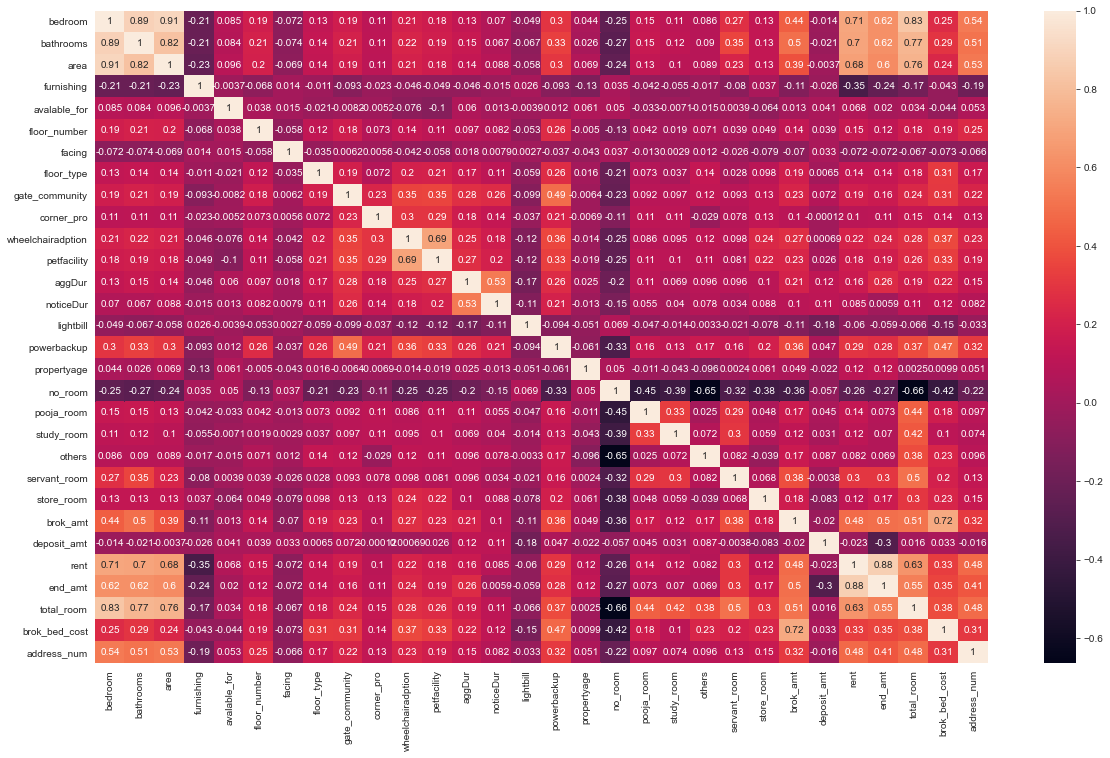

In [64]:
plt.figure( figsize =(20,12))
sns.heatmap(df.corr(),annot = True)

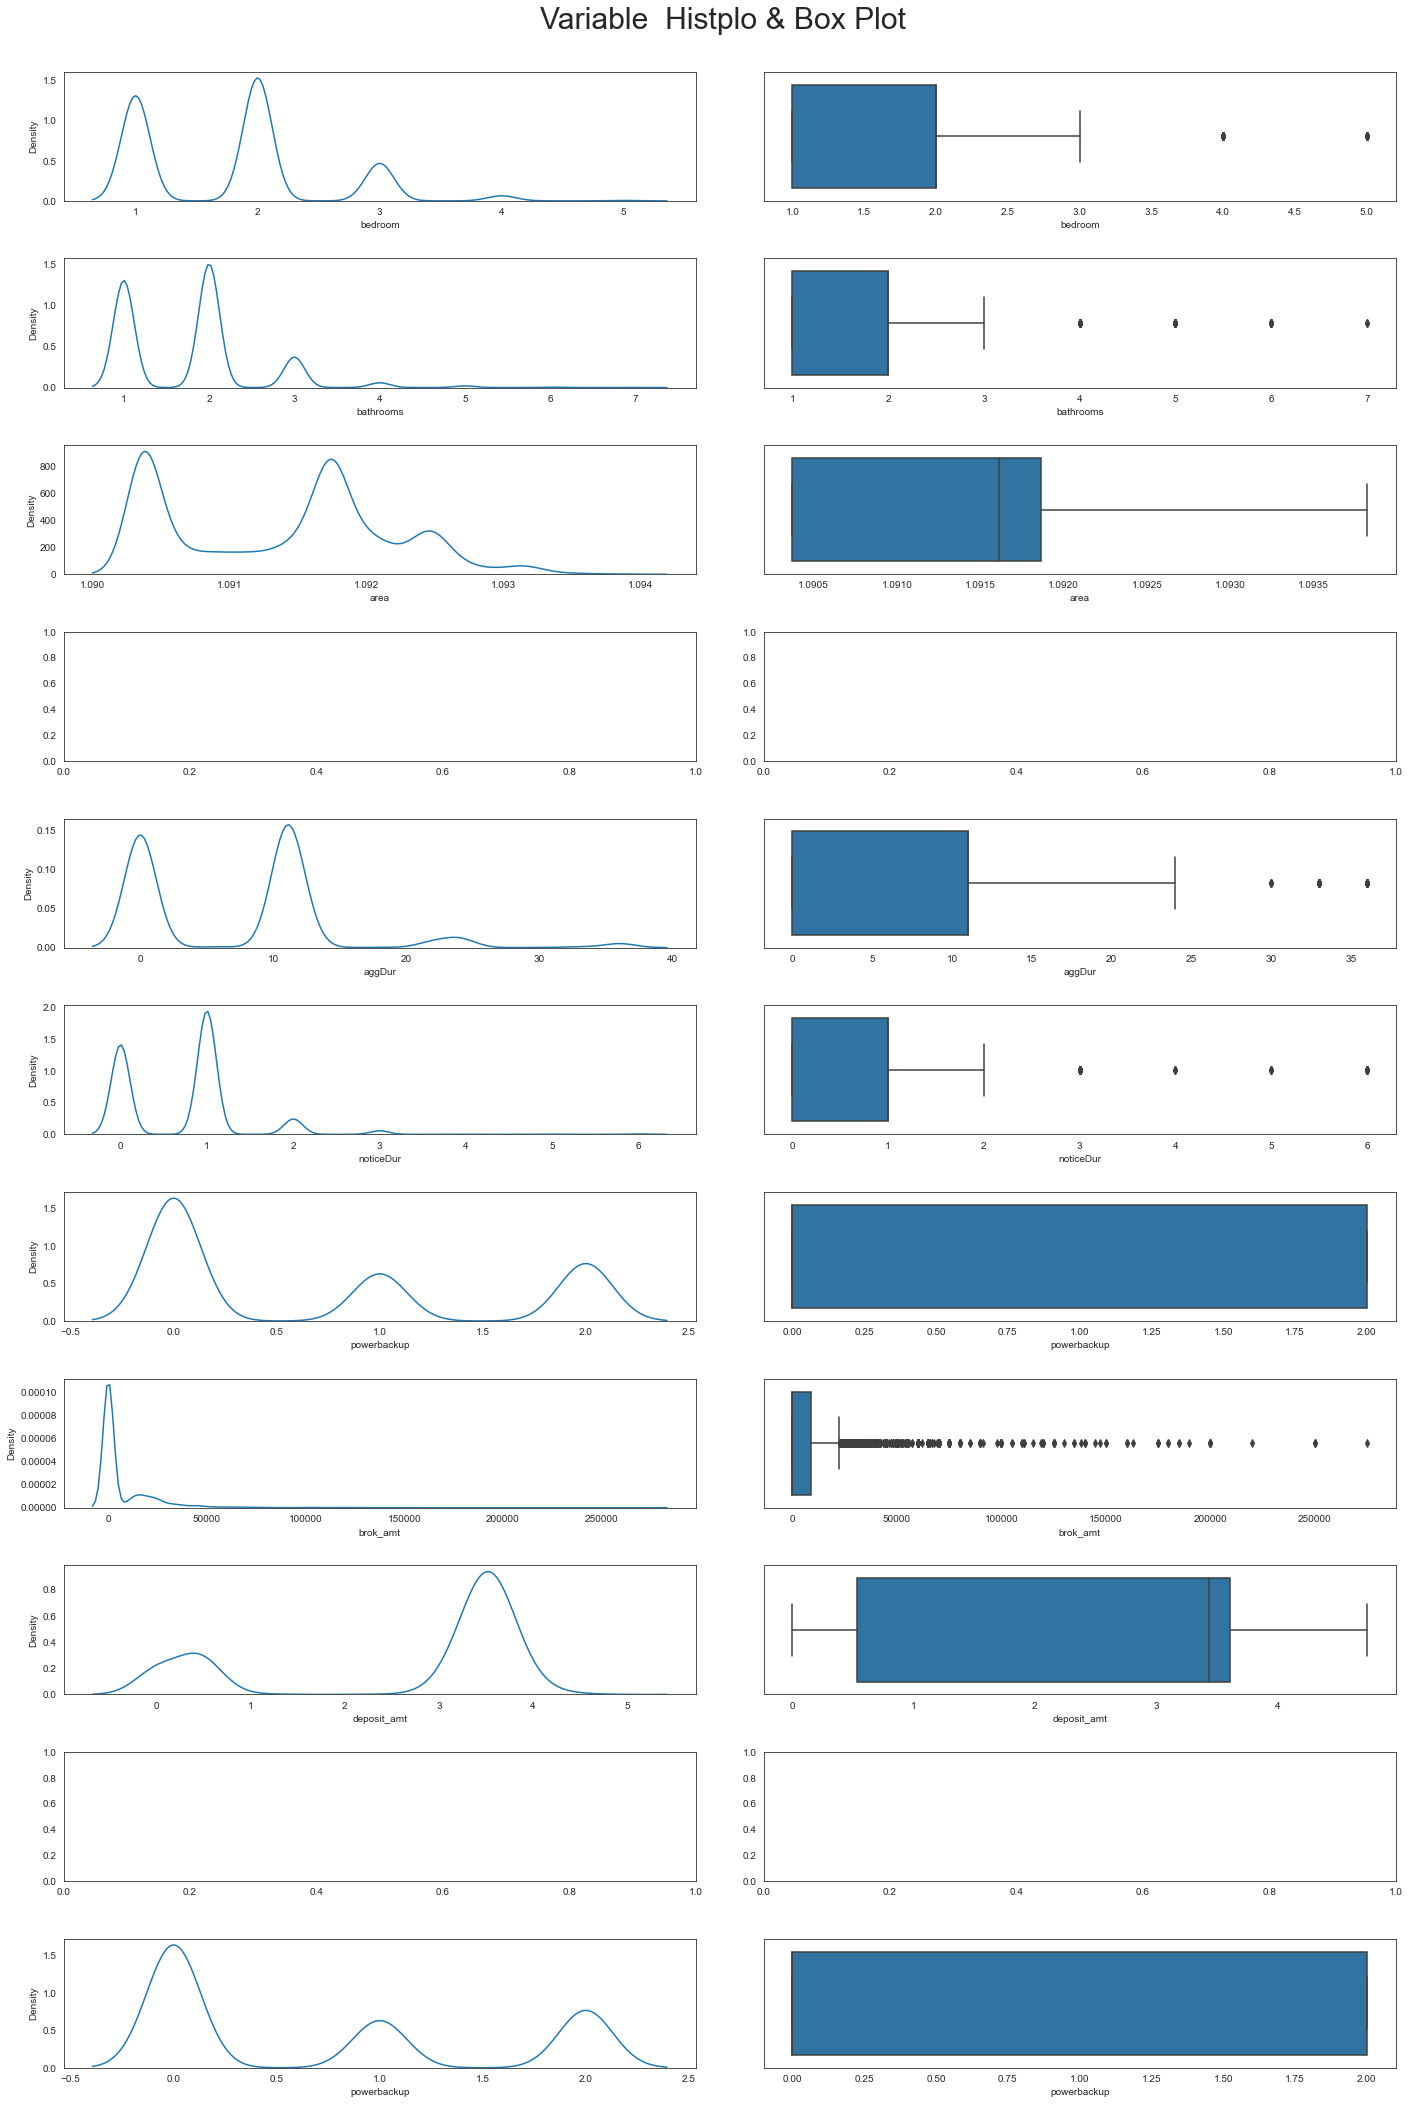

In [65]:
fig, ax = plt.subplots(11,2, figsize = (20,30))
fig.tight_layout(pad = 4.0)
fig.subplots_adjust(top = 0.95)
fig.suptitle('Variable  Histplo & Box Plot', size = 30)
sns.kdeplot(ax= ax[0,0], data = df, x = 'bedroom')
sns.boxplot(ax= ax[0,1], data = df, x = 'bedroom')
sns.kdeplot(ax= ax[1,0], data = df, x = 'bathrooms')
sns.boxplot(ax= ax[1,1], data = df, x = 'bathrooms')
sns.kdeplot(ax= ax[2,0], data = df, x = 'area')
sns.boxplot(ax= ax[2,1], data = df, x = 'area')
# sns.kdeplot(ax= ax[3,0], data = df, x = 'parking')
# sns.boxplot(ax= ax[3,1], data = df, x = 'parking')
sns.kdeplot(ax= ax[4,0], data = df, x = 'aggDur')
sns.boxplot(ax= ax[4,1], data = df, x = 'aggDur')
sns.kdeplot(ax= ax[5,0], data = df, x = 'noticeDur')
sns.boxplot(ax= ax[5,1], data = df, x = 'noticeDur')
sns.kdeplot(ax= ax[6,0], data = df, x = 'powerbackup')
sns.boxplot(ax= ax[6,1], data = df, x = 'powerbackup')
sns.kdeplot(ax= ax[7,0], data = df, x = 'brok_amt')
sns.boxplot(ax= ax[7,1], data = df, x = 'brok_amt')
sns.kdeplot(ax= ax[8,0], data = df, x = 'deposit_amt')
sns.boxplot(ax= ax[8,1], data = df, x = 'deposit_amt')
# sns.kdeplot(ax= ax[9,0], data = df, x = 'mnt_amt')
# sns.boxplot(ax= ax[9,1], data = df, x = 'mnt_amt')
sns.kdeplot(ax= ax[10,0], data = df, x = 'powerbackup')
sns.boxplot(ax= ax[10,1], data = df, x = 'powerbackup')
fig.savefig('outlier.png')

## Feature_selection 

<AxesSubplot:>

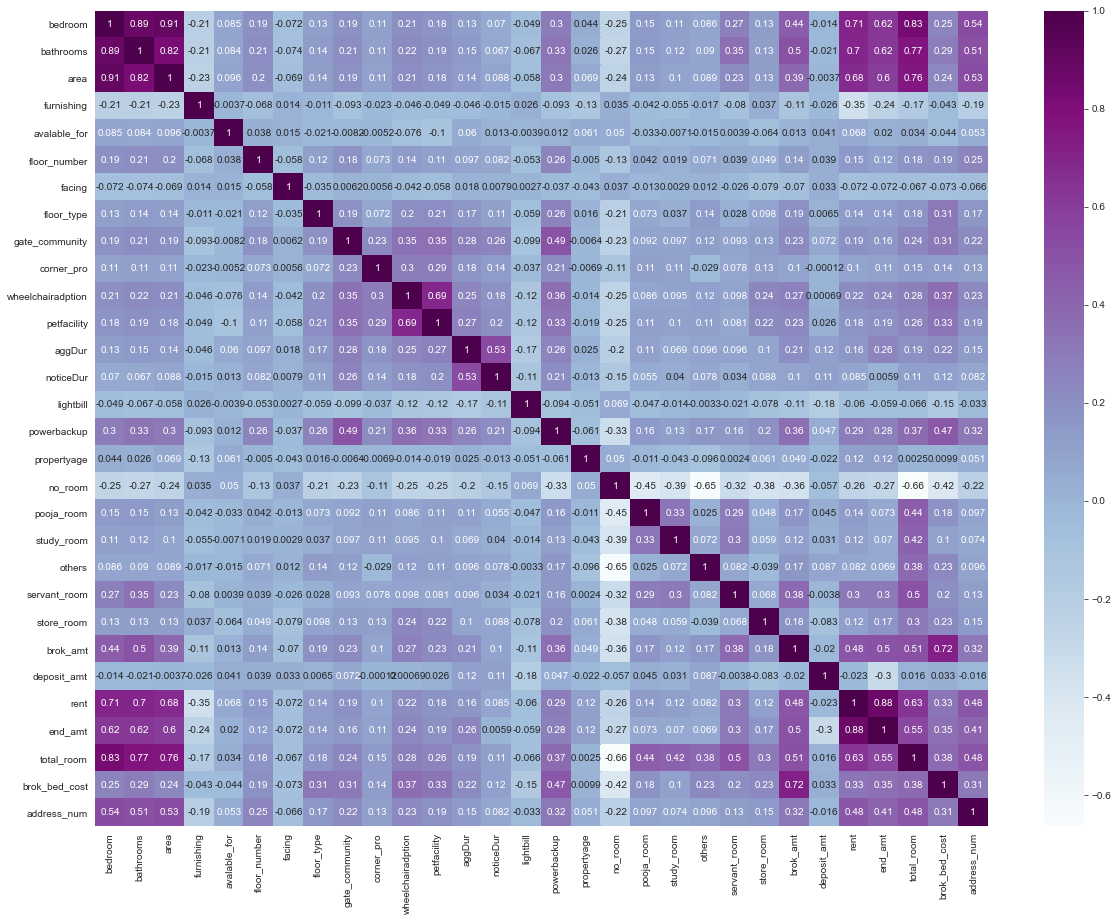

In [66]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True, cmap= 'BuPu')

In [67]:
df.drop(['bathrooms'], axis = 1, inplace = True) # highly corelated

In [68]:
for i in df.columns:  #looking for min & maximum
    print(i, df[i].max(), df[i].min())

bedroom 5 1
area 1.0938188301130152 1.0903741138185108
furnishing 2 0
avalable_for 7 0
floor_number 9 0
facing 8 0
floor_type 14 0
gate_community 1 0
corner_pro 1 0
wheelchairadption 1 0
petfacility 1 0
aggDur 36 0
noticeDur 6 0
lightbill 1 0
powerbackup 2 0
propertyage 5 0
no_room 1 0
pooja_room 1 0
study_room 1 0
others 1 0
servant_room 1 0
store_room 1 0
brok_amt 275001 1
deposit_amt 4.740325444246294 0.0
rent 98001.0 1601.0
end_amt inf -inf
total_room 9 1
brok_bed_cost 11.46164795993171 0.18232155679395465
address_num 2.23606797749979 1.0


In [69]:
# filling infinity values with proper median category
df['end_amt'] = df['end_amt'].replace([np.inf, -np.inf], [df['end_amt'].median(),df['end_amt'].median()])
df['end_amt'].fillna(df['end_amt'].median(), inplace  =True)

## Model Building

In [70]:
X = df.drop(['rent'], axis = 1)
y = df['rent']
final_train, final_test, final_train_target, final_test_target = train_test_split(X, y, test_size = 0.2)

In [71]:
 X_train, X_test, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2)

In [72]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [73]:
scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(np.mean(scores))
# 0.6829596767515921

0.686722636546184


### RandomForest Regressor

In [74]:
scores = []
# on scaled data
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(np.mean(scores))
# 0.6829596767515921

0.6998478484700315


In [75]:
scores = []
from sklearn.ensemble import RandomForestRegressor
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(np.mean(scores))

0.8621924064278892


In [76]:
scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, (y), test_size = 0.25)
    
    model = RandomForestRegressor(n_estimators= 100, bootstrap=True)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    print(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

print(np.mean(scores))

3513.8542102960046
3426.727240141162
3767.041697788138
4056.2720776540673
3770.5259547701703
4201.422275069603
3490.0516009170497
3948.7610579671773
3469.380817860527
3519.9288248197045
0.8633483800206168


**Scaled data is hace better score than orinigal**


### RANDOM FOREST - KFOLD AND MODEL 

In [77]:

import numpy as np

target= np.array(df['rent'])
features = df.drop('rent', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

## RANDOM FOREST - KFOLD AND MODEL 


from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 10, 
                               random_state = 42, 
                               criterion = 'mse',
                               bootstrap=True)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    print('train  accuracy  ', np.sqrt(mean_squared_error(target_train, rf.predict(data_train))))
    print('train  accuracy  ', np.sqrt(mean_squared_error(target_test, rf.predict(data_test))))
    print('r2score train ', r2_score(target_train, rf.predict(data_train)))
    print('r2score train ' , r2_score(target_test, rf.predict(data_test)))
    
    

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)

Mean Absolute Error: 1787.41
Accuracy: 88.47 %.
train  accuracy   1669.2397358701446
train  accuracy   4201.6171762513195
r2score train  0.9732825395835102
r2score train  0.8080216872507181
Mean Absolute Error: 2096.46
Accuracy: 85.71 %.
train  accuracy   1634.9430206576146
train  accuracy   4345.514252325613
r2score train  0.9740028451420791
r2score train  0.8204280304445628
Mean Absolute Error: 1919.58
Accuracy: 86.74 %.
train  accuracy   1591.1140002521022
train  accuracy   4021.569560910387
r2score train  0.9753304442815067
r2score train  0.8488298561846015
Mean Absolute Error: 1790.21
Accuracy: 88.24 %.
train  accuracy   1679.6215438963047
train  accuracy   3933.4842442472773
r2score train  0.9725576726237564
r2score train  0.8531743995615388
Mean Absolute Error: 1815.4
Accuracy: 87.68 %.
train  accuracy   1654.8859839834777
train  accuracy   3570.3752283209733
r2score train  0.973861718121219
r2score train  0.8544947787528763
Mean Absolute Error: 1832.85
Accuracy: 87.26 %.
train 

### Tuning preparation

In [118]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

### Parameter Tuning

In [79]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_train, target_train)

print(rf_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


**output {'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}**

### Training with best parameters

In [ ]:

import numpy as np

target= np.array(df['rent'])
features = df.drop('rent', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

## RANDOM FOREST - KFOLD AND MODEL 


from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 2000, 
                               min_samples_leaf= 2,
                               min_samples_split= 5,
                               max_features= 'auto',
                               max_depth= 50,
                               random_state = 42, 
                               criterion = 'mse',
                               bootstrap=True) 
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    print('train  accuracy  ', np.sqrt(mean_squared_error(target_train, rf.predict(data_train))))
    print('train  accuracy  ', np.sqrt(mean_squared_error(target_test, rf.predict(data_test))))
    print('r2score train ', r2_score(target_train, rf.predict(data_train)))
    print('r2score train ' , r2_score(target_test, rf.predict(data_test)))
    
    

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)

In [82]:
rf = RandomForestRegressor(n_estimators = 2000, 
                               min_samples_leaf= 2,
                               min_samples_split= 5,
                               max_features= 'auto',
                               max_depth= 50,
                               random_state = 42, 
                               criterion = 'mse',
                               bootstrap=True)

In [83]:
model_final = rf.fit(X,y)
# scaled_model = rf.fit(X_scaled, y)

In [84]:
model_final

RandomForestRegressor(max_depth=50, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=2000, random_state=42)

## Testing with new donwloaded data

In [85]:
test_data = pd.read_csv('test_pre.cvs')
test_data.head()

,bedroom,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,wheelchairadption,...,others,servant_room,store_room,brok_amt,deposit_amt,rent,end_amt,total_room,brok_bed_cost,address_num
0,2,0.960744,1,0,1,1,7,0,0,0,...,0,0,0,1,0.000000,18501.0,8921.969697,2,0.405465,1.485815
1,2,0.960926,1,0,2,8,7,1,1,1,...,0,0,0,1,3.683635,21001.0,18375.000000,2,0.405465,1.348334
2,2,0.960805,1,0,6,1,7,1,0,0,...,0,0,0,1,3.375557,12001.0,8921.969697,2,0.405465,1.301968
3,3,0.960958,0,6,1,0,8,1,0,1,...,0,0,0,24001,0.462098,24001.0,47997.000000,3,8.987363,1.335540
4,1,0.960389,1,6,4,0,13,1,1,1,...,1,0,0,1,0.462098,13501.0,13499.916667,2,0.693147,1.000000


{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 600}

In [86]:
true_test= test_data.drop('rent', axis = 1)
true_value = test_data.rent


In [88]:
from sklearn.metrics import mean_squared_log_error
print(r2_score((true_value), (model_final.predict(true_test))))
print(np.sqrt(mean_squared_error((true_value), (model_final.predict(true_test)))))
print(np.sqrt(mean_squared_log_error((true_value), (model_final.predict(true_test)))))
print((mean_absolute_error((true_value), (model_final.predict(true_test)))))

0.7891920137805604
4570.8394091464415
0.2339250953380051
2177.3507321391335


In [93]:
model_final

RandomForestRegressor(max_depth=50, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=2000, random_state=42)

#### pickle

In [101]:
import pickle
pickl = {'model': model_final}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [115]:
data_input= list(X.iloc[0])